In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [82]:
import plotly.io as pio
import matplotlib.pyplot as plt

In [28]:
data_path=r"C:\Users\VAnagn02\Downloads\marketing_campaign.csv"
# Read Dataset
data=pd.read_csv(data_path, sep="\t")

In [29]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [30]:
data.shape

(2240, 29)

In [31]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

In [32]:
income_missing_values=data['Income'].isnull()
income_missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool

In [33]:
#drop the lines that has null in the income
data_wno_miss_values=data[~data['Income'].isnull()]

In [34]:
data_wno_miss_values.shape

(2216, 29)

In [35]:
data_wno_miss_values.duplicated().sum()

np.int64(0)

In [36]:
# CLV is TotalPurchaseAmount/TotalPurchase
data_wno_miss_values["TotalPurchaseAmount"] = data[["MntWines", "MntFruits", "MntMeatProducts",
                                 "MntFishProducts", "MntSweetProducts",
                                 "MntGoldProds"]].sum(axis=1)

In [37]:
data_wno_miss_values["TotalPurchases"] = data[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum(axis=1)

In [38]:
# Calculate the Average purchase value of each customer
data_wno_miss_values['APV']=round(data_wno_miss_values["TotalPurchaseAmount"]/data_wno_miss_values['TotalPurchases'],3)

In [39]:
# Convert 'Dt_Customer' to datetime format
data_wno_miss_values['Dt_Customer'] = pd.to_datetime(data_wno_miss_values['Dt_Customer'], format='%d-%m-%Y')
# Define the date '29/6/2015' and convert it to datetime
specific_date = pd.to_datetime('29/6/2015', format='%d/%m/%Y')
# Calculate the difference between each date in the column and the specific date
data_wno_miss_values['Time_Since_Enrollmen'] = (specific_date - data_wno_miss_values['Dt_Customer']).dt.days

In [40]:
data_wno_miss_values['Time_Since_Enrollmen']

0       1028
1        478
2        677
3        504
4        526
        ... 
2235     746
2236     384
2237     520
2238     521
2239     987
Name: Time_Since_Enrollmen, Length: 2216, dtype: int64

In [41]:
# Calculate Average Purchase Frequency (APF)
data_wno_miss_values['APF'] = round(data_wno_miss_values['TotalPurchases'] / data_wno_miss_values['Time_Since_Enrollmen'],3)

In [42]:
# create a new column NumCmpResponce by aggregating all the campaign responces
data_wno_miss_values["NumCmpResponce"] = data_wno_miss_values[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3",
                                 "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum(axis=1)

In [43]:
lifespan = round(data_wno_miss_values["NumDealsPurchases"].mean() + data_wno_miss_values["NumCmpResponce"].mean())

# Calculate CLV
data_wno_miss_values['CLV'] = round(data_wno_miss_values['APV'] * data_wno_miss_values['APF'] * lifespan,3)

data_wno_miss_values["CLV_Score"] = pd.qcut(data_wno_miss_values['CLV'], q=3, labels=['Low', 'Medium', 'High'])

In [44]:
# set a new name in the dataset
data_cleaned=data_wno_miss_values
data_cleaned

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,TotalPurchaseAmount,TotalPurchases,APV,Time_Since_Enrollmen,APF,NumCmpResponce,CLV,CLV_Score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,1617,22,73.500,1028,0.021,1,4.631,High
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,27,4,6.750,478,0.008,0,0.162,Low
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,776,20,38.800,677,0.030,0,3.492,High
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,53,6,8.833,504,0.012,0,0.318,Low
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,422,14,30.143,526,0.027,0,2.442,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,11,0,1341,16,83.812,746,0.021,0,5.280,High
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,11,0,444,15,29.600,384,0.039,1,3.463,High
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,11,0,1241,18,68.944,520,0.035,1,7.239,High
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,11,0,843,21,40.143,521,0.040,0,4.817,High


In [55]:
# define the values of RFM scores
# as recency is higher as lower recency
recency_scores=[5,4,3,2,1]
#as higher the value as higher frequency
frequency_scores=[1,2,3,4,5]
#as higher the value as higher monetary
monetary_scores=[1,2,3,4,5]

In [56]:
bins=5

In [57]:
# Calculate RFM scores
data_cleaned['RecencyScore'] = pd.cut(data_cleaned['Recency'], bins=bins, labels=recency_scores)
data_cleaned['FrequencyScore'] = pd.cut(data_cleaned['TotalPurchases'], bins=bins, labels=frequency_scores)
data_cleaned['MonetaryScore'] = pd.cut(data_cleaned['TotalPurchaseAmount'], bins=bins, labels=monetary_scores)

In [59]:
# Convert RFM scores to numeric 
data_cleaned['RecencyScore'] = data_cleaned['RecencyScore'].astype(int)
data_cleaned['FrequencyScore'] = data_cleaned['FrequencyScore'].astype(int)
data_cleaned['MonetaryScore'] = data_cleaned['MonetaryScore'].astype(int)

In [60]:
# calculate the RFM score 
data_cleaned['RFM_Score'] = data_cleaned['RecencyScore'] + data_cleaned['FrequencyScore'] + data_cleaned['MonetaryScore']

In [63]:
# Define RFM segments based on the RFM score
segment_labels = ['low_value', 'medium_value', 'high_value']
data_cleaned['Value_Segment'] = pd.qcut(data_cleaned['RFM_Score'], q=3, labels=segment_labels)
data_cleaned

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Time_Since_Enrollmen,APF,NumCmpResponce,CLV,CLV_Score,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value_Segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1028,0.021,1,4.631,High,3,4,4,11,high_value
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,478,0.008,0,0.162,Low,4,1,1,6,low_value
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,677,0.030,0,3.492,High,4,4,2,10,high_value
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,504,0.012,0,0.318,Low,4,1,1,6,low_value
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,526,0.027,0,2.442,Medium,1,3,1,5,low_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,746,0.021,0,5.280,High,3,3,3,9,high_value
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,384,0.039,1,3.463,High,3,3,1,7,medium_value
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,520,0.035,1,7.239,High,1,3,3,7,medium_value
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,521,0.040,0,4.817,High,5,4,2,11,high_value


C:\Users\VAnagn02\AppData\Local\Temp\ipykernel_33280\1038247654.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



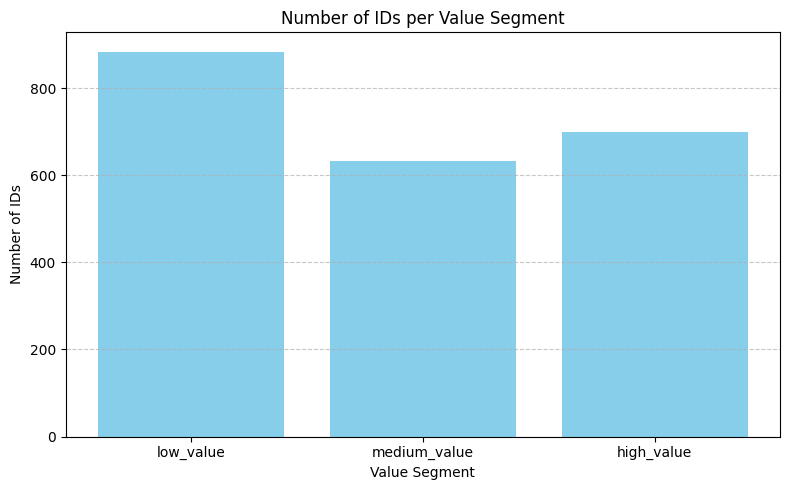

In [ ]:

segment_counts = data_cleaned.groupby('Value_Segment')['ID'].count().reset_index()

# Creaton of a bar plot
plt.figure(figsize=(8, 5))
plt.bar(segment_counts['Value_Segment'], segment_counts['ID'], color='skyblue')
plt.xlabel('Value Segment')
plt.ylabel('Number of IDs')
plt.title('Number of IDs per Value Segment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
